**
MODEL REGRESI LINEAR MULTIPLE UNTUK ESTIMASI BERAT DARI PENGUKURAN IKAN**

Tujuan dari penelitian ini adalah untuk memperkirakan berat individu ikan berdasarkan pengukuran mereka menggunakan model regresi linear.

Studi ini dapat ditingkatkan untuk digunakan dalam peternakan ikan. Ikan individu yang berenang di depan kamera dapat diukur dari gambar video dan berat ikan dapat diperkirakan melalui model regresi linear.

In [ ]:
import numpy as np # digunakan untuk operasi numerik dan komputasi ilmiah.
import pandas as pd # membaca dataset
import seaborn as sns #visualisasi data agar lebih menarik
import matplotlib.pyplot as plt #digunakan untuk membuat plot dan visualisasi data
import statsmodels.api as sm #untuk analisis statistik dan model
import statsmodels.formula.api as smf #digunakan untuk analisis statistik dengan sintaks formula.
from sklearn.linear_model import LinearRegression #untuk membangun model regresi linear.
from sklearn.metrics import mean_squared_error, r2_score #untuk mengukur score model regresi linear.


**1. MEMAHAMI DATASET**

In [ ]:
data = pd.read_csv('Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
21,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704
118,Perch,820.0,36.6,39.0,41.3,12.4313,7.3514
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
22,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
66,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944


**arti kolomnya:**
* Species: Nama spesies ikan
* Weight: Bobot ikan dalam gram
* Length1: Panjang vertikal dalam cm
* Length2: Panjang diagonal dalam cm
* Length3: Panjang lintang dalam cm
* Height: Tinggi ikan dalam cm
* Width: Lebar diagonal dalam cm

 Variabel terikatnya adalah 'Weight' (berat).
 Variabel bebas adalah 'species' (spesies) berbagai macam panjangnya,
 'height' (tinggi), dan 'width' (lebar).

Saya akan menggunakan variabel bebas (pengukuran ikan) untuk memperkirakan variabel terikat (berat ikan).

**Mengubah nama kolomnya :**

In [ ]:
#mengubah nama kolom
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
#mecari tahu info tentang datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Mencari tahu apakah ada data yang masih kosong:**

In [ ]:
print(str('apakah masih ada data yang kosong(NaN)?: '), df.isnull().values.any())

apakah masih ada data yang kosong(NaN)?:  False


**Mencari tahu spesies yang berbeda dan jumlahnya:**

In [ ]:
sp = df['Species'].value_counts() #menghitung jumlah nilai dalam kolom 'Species' dan menyimpannya dalam variabel sp
sp = pd.DataFrame(sp) #mengubah objek sp menjadi DataFrame dengan menggunakan konstruktor pd.DataFrame()
sp.T #Mentranspose DataFrame(menggunakan metode .T, kita mendapatkan DataFrame dengan spesies sebagai kolom dan jumlahnya sebagai nilai dalam satu baris.)

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


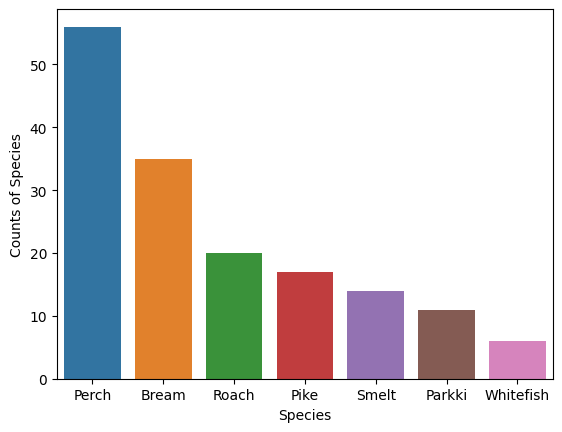

In [ ]:
sns.barplot(x=sp.index, y=sp['Species']); #menampilkan grafik untuk menentukan nilai yang akan digunakan pada sumbu x
plt.xlabel('Species') #menambahkan label nama nama spesies ikan pada sumbu x
plt.ylabel('Counts of Species') #menambahkan label nilai jumlah ikan pada sumbu y
plt.show() #menampilkan grafik

**Correlation of the Variables:**

In [ ]:
df.corr() #digunakan untuk menghitung matriks korelasi antara kolom-kolom numerik dalam DataFrame df.

<ipython-input-9-850e90dafe75>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #digunakan untuk menghitung matriks korelasi antara kolom-kolom numerik dalam DataFrame df.


,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Setiap elemen dalam DataFrame tersebut mewakili koefisien korelasi antara dua kolom. Nilai korelasi berkisar antara -1 hingga 1, dengan nilai 1 menunjukkan korelasi positif sempurna, nilai -1 menunjukkan korelasi negatif sempurna, dan nilai 0 menunjukkan tidak adanya korelasi linier antara dua variabel.

<ipython-input-10-6f7bcfbc3b1c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');


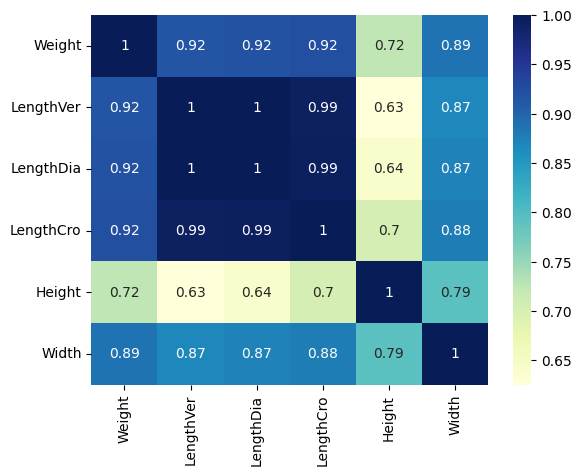

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
#digunakan untuk membuat peta sebaran dari matriks korelasi dalam DataFrame df.

* sns.heatmap(): Kode ini digunakan untuk membuat peta panas menggunakan fungsi heatmap() dari library Seaborn.

* df.corr(): Kode ini mengambil matriks korelasi dari DataFrame df menggunakan metode .corr().

* annot=True: Kode ini mengatur untuk menyertakan nilai-nilai korelasi sebagai anotasi pada peta panas. Dengan mengatur annot=True, nilai korelasi akan ditampilkan di setiap sel pada peta panas.

* cmap='YlGnBu': Kode ini mengatur skema warna (colormap) yang digunakan pada peta panas. Dalam kasus ini, digunakan skema warna 'YlGnBu' yang berarti menggunakan gradasi warna dari kuning hingga hijau ke biru untuk mewakili tingkat korelasi.

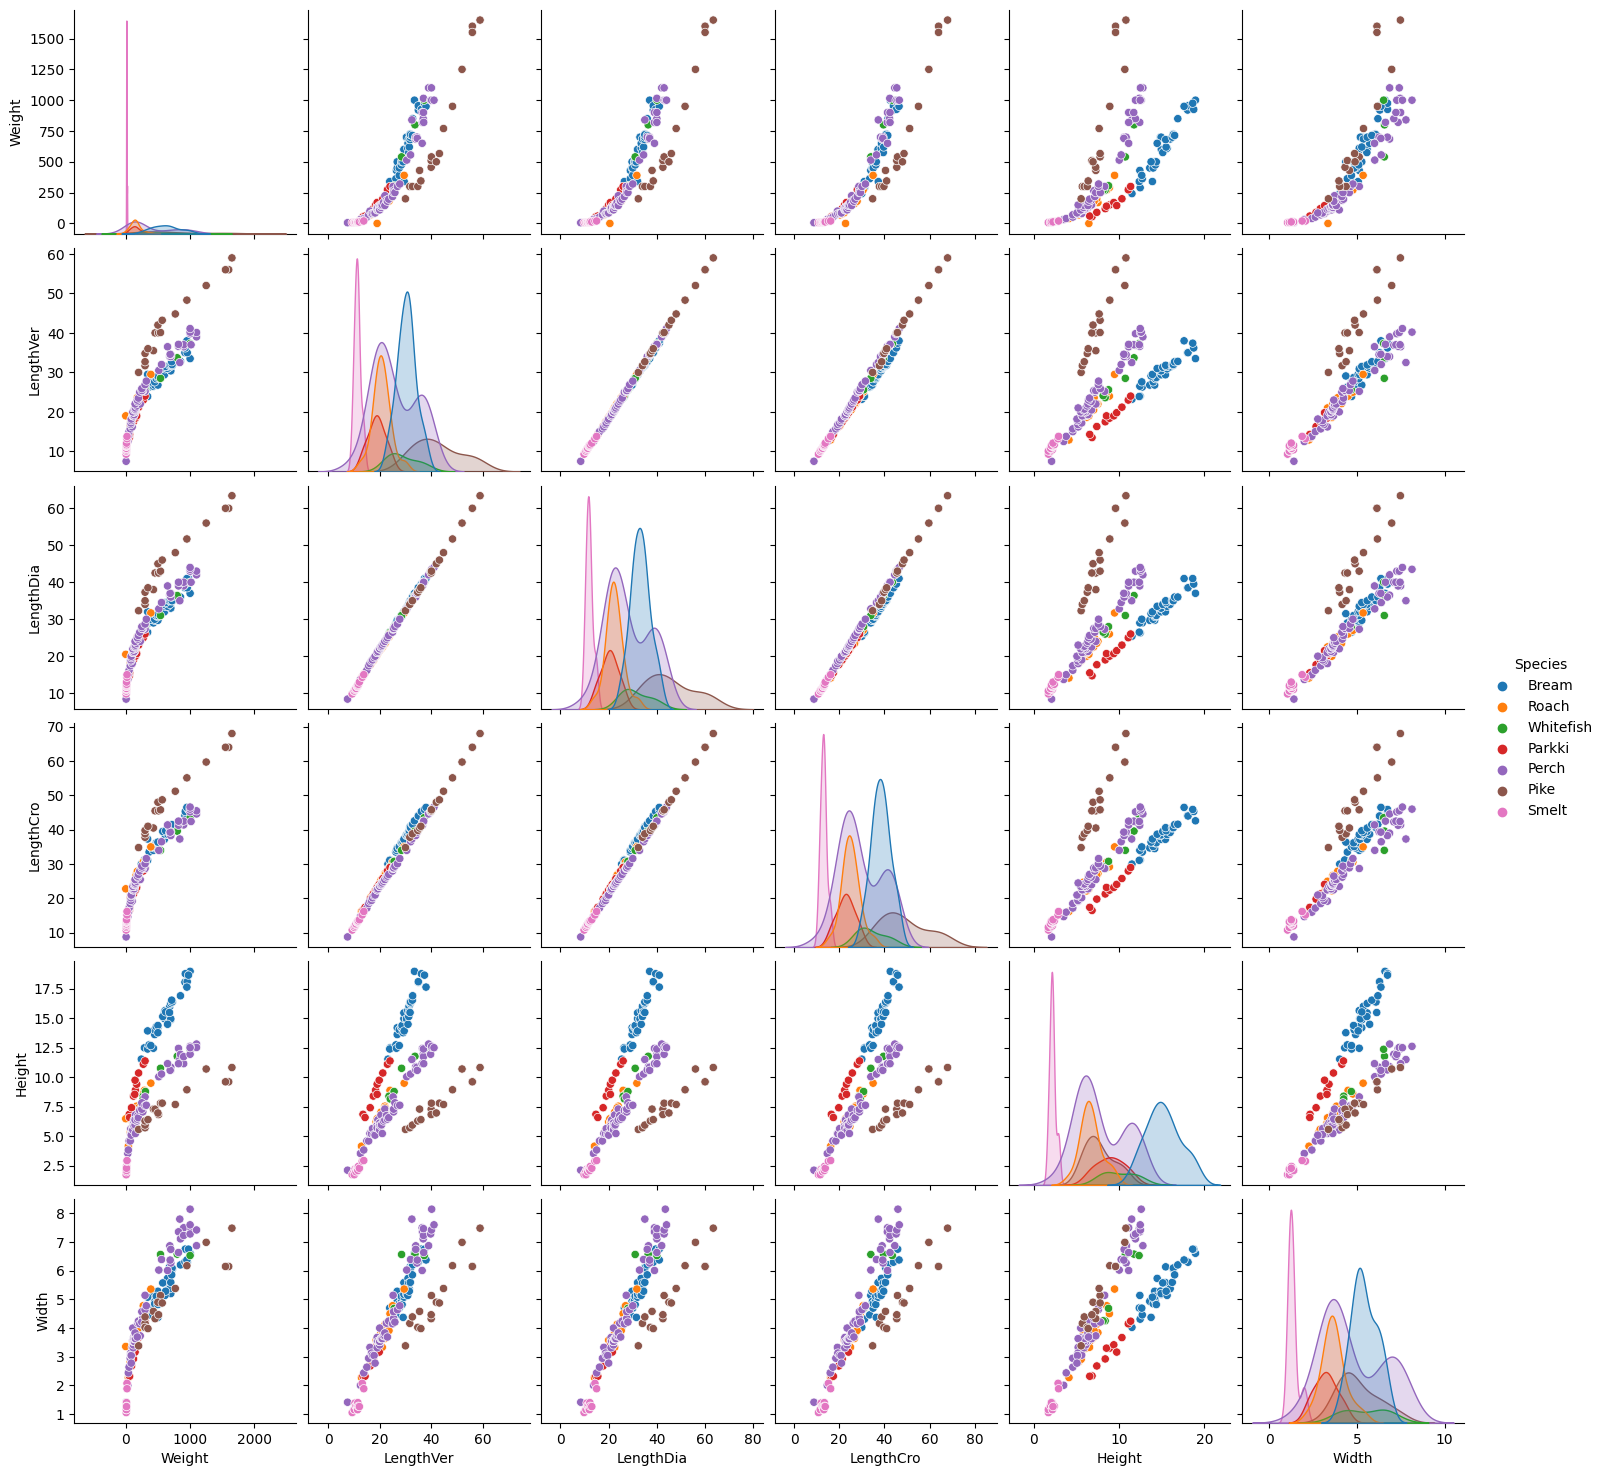

In [ ]:
g = sns.pairplot(df, kind='scatter', hue='Species');
# digunakan untuk memvisualisasikan hubungan antara dua variabel numerik.

**Statistik dari grafik dataset tersebut:**

In [ ]:
df.describe().T #menghasilkan ringkasan dari statistik tersebut

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Berdasarkan ringkasan statistik tersebut, kita dapat menarik beberapa kesimpulan tentang setiap variabel:

* Variabel 'Weight' memiliki rata-rata sekitar 398.33 gram, dengan rentang nilai antara 0 hingga 1650 gram.
* Variabel 'LengthVer' memiliki rata-rata sekitar 26.25 cm, dengan rentang nilai antara 7.5 hingga 59 cm.
* Variabel 'LengthDia' memiliki rata-rata sekitar 28.42 cm, dengan rentang nilai antara 8.4 hingga 63.4 cm.
* Variabel 'LengthCro' memiliki rata-rata sekitar 31.23 cm, dengan rentang nilai antara 8.8 hingga 68 cm.
* Variabel 'Height' memiliki rata-rata sekitar 8.97 cm, dengan rentang nilai antara 1.73 hingga 18.96 cm.
* Variabel 'Width' memiliki rata-rata sekitar 4.42 cm, dengan rentang nilai antara 1.05 hingga 8.14 cm.

**menganalisis dan menangani nilai-nilai outlier dalam dataset**

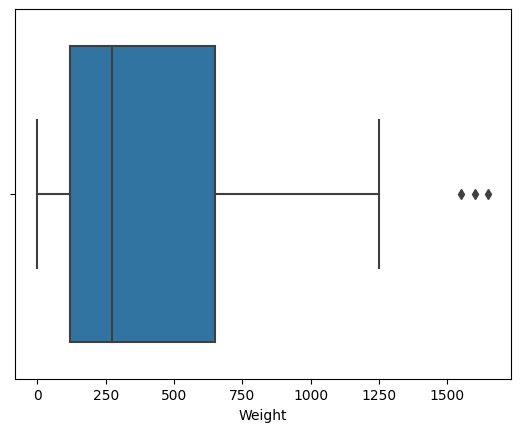

In [ ]:
sns.boxplot(x=df['Weight']);
#digunakan untuk membuat box plot dari kolom 'Weight' dalam DataFrame df.

In [ ]:
dfw = df['Weight'] #Membuat DataFrame baru dfw yang berisi kolom 'Weight' dari DataFrame df.
dfw_Q1 = dfw.quantile(0.25) #Menghitung kuartil pertama (Q1) dari data dalam kolom 'Weight'.
dfw_Q3 = dfw.quantile(0.75) #Menghitung kuartil ketiga (Q3) dari data dalam kolom 'Weight'.
dfw_IQR = dfw_Q3 - dfw_Q1 #IQR digunakan sebagai ukuran penyebaran data di antara kuartil-kuartil
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR) #Nilai ini akan digunakan sebagai batas bawah dalam deteksi outliers menggunakan metode IQR.
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR) #digunakan sebagai batas atas dalam deteksi outliers menggunakan metode IQR.

In [ ]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers
#pengidentifikasian nilai-nilai outliers pada kolom 'Weight' dalam DataFrame df
#menggunakan batas bawah dan batas atas yang telah dihitung sebelumnya.

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

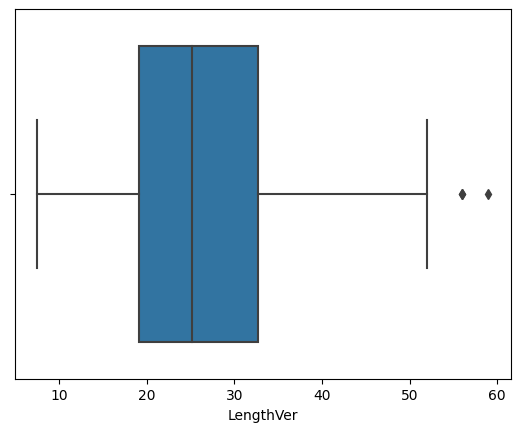

In [ ]:
sns.boxplot(x=df['LengthVer']);
#digunakan untuk membuat box plot dari kolom 'LengthVer' dalam DataFrame df.

In [ ]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

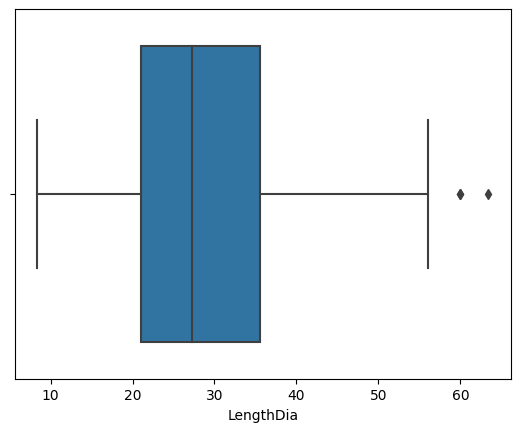

In [ ]:
sns.boxplot(x=df['LengthDia']);

In [ ]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

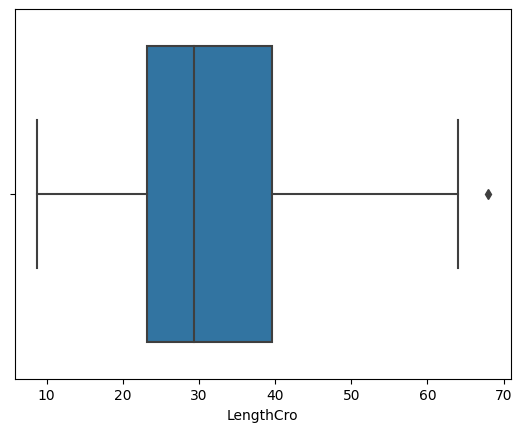

In [ ]:
sns.boxplot(x=df['LengthCro']);

In [ ]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

**menampilkan dataset outlier:**

In [ ]:
df[142:145] #digunakan untuk menampilkan baris data dari indeks ke-142 hingga ke-144 dalam DataFrame df.

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


terdapat dataset yang merupakan outlier yaitu 142,143,144 yang selanjutnya akan dihapus

**melakukan analisis statistik dasar setelah menghilangkan outliers.**

In [ ]:
df1 = df.drop([142,143,144]) #menghapus data dengan nomor index 142,143,144
df1.describe().T #menampilkan statistik deskriptif dari DataFrame df1 yang baru secara transposisi.

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


**2.PERSIAPAN UNTUK MODELING :**

**Pemisahan Variabel Terikat dan Variabel Bebas**

In [ ]:
y = df1['Weight'] # Y berisi nilai dari kolom 'Weight'
X = df1.iloc[:,2:7]
#X berisi nilai dari kolom-kolom indeks ke-2 sampai 6 yang mewakili variabel bebas untuk prediksi

**Pemisahan Dataset menjadi Dataset Latih dan Dataset Uji**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Setelah pemanggilan fungsi train_test_split, dataset latih dan dataset uji akan dibagi menjadi empat subset variabel:

* X_train berisi subset variabel bebas untuk dataset latih.
* X_test berisi subset variabel bebas untuk dataset uji.
* y_train berisi subset variabel terikat untuk dataset latih.
* y_test berisi subset variabel terikat untuk dataset uji.

In [ ]:
#mencaritahu berapa jumlah sample yang ada dalam dataset
print('Berapa jumlah sampel yang ada dalam dataset latih dan dataset uji?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Berapa jumlah sampel yang ada dalam dataset latih dan dataset uji?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


* X_train: Menampilkan dimensi dari X_train, yaitu jumlah baris (sampel) dan jumlah kolom (variabel bebas) dalam dataset latih.
* y_train: Menampilkan dimensi dari y_train, yaitu jumlah baris (sampel) dalam dataset latih (variabel terikat).
* X_test: Menampilkan dimensi dari X_test, yaitu jumlah baris (sampel) dan jumlah kolom (variabel bebas) dalam dataset uji.
* y_test: Menampilkan dimensi dari y_test, yaitu jumlah baris (sampel) dalam dataset uji (variabel terikat).

**Formula Regresi Linear Berganda:**

y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn

y : Variabel terikat (dependent variable)

b0 : Konstanta

b1 - bn : Koefisien

X1 - Xn : Variabel bebas (independent variables)


**Model Regresi Linear Sklearn:**

kelompok 5 akan melatih model dengan menggunakan dataset latih

In [ ]:
reg = LinearRegression() #untuk melatih model regresi linear.
reg.fit(X_train,y_train) # untuk melatih model dengan dataset latih.

LinearRegression()

**Formula regresi linear model:**

In [ ]:

print('Model intercept: ', reg.intercept_) # mencetak nilai intercept (b0) dari model regresi linear yang telah dilatih.
print('Model coefficients: ', reg.coef_) #mencetak nilai koefisien yang menghubungkan masing-masing variabel bebas dengan variabel terikat.

Model intercept:  -441.00887253881797
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [ ]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


Rumus ini akan memberikan gambaran tentang hubungan antara variabel terikat (y) dengan masing-masing variabel bebas (X1, X2, ..., Xn).

Misalnya, jika kita memiliki 5 variabel bebas (X1, X2, X3, X4, X5), rumus regresi linear akan dicetak sebagai berikut:
* y = b0 + b1X1 + b2X2 + b3X3 + b4X4 + b5*X5

Dalam contoh ini, menggunakan nilai %.2f untuk memformat koefisien menjadi dua desimal di dalam string.  format tersebut dapat disesuaikan dengan preferensi yang diinginkan

**3. PREDIKSI MENGGUNKAN MODEL REGRESILINEAR**

**Memprediksi bobot dari dataset latih:**

In [ ]:
y_head = reg.predict(X_train)
 # menyimpan hasil prediksi bobot (variabel terikat) dari dataset latih (X_train) menggunakan model regresi linear (reg).

**Menganalisis Keberhasilan Model dari Dataset Latih dan Prediksinya:**

In [ ]:
r2_score(y_train, y_head)*100
#menampilkan score hasil nilai prediksi

91.16039087262156


Tapi, jika kita mengubah nilai random_state,

 sampel latih dan uji kita akan berbeda dan skor model akan berbeda pula.

  Untuk mengatasi perubahan ini, kita dapat menggunakan validasi silang (cross-validation)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


Dalam kode di atas, kita menggunakan fungsi cross_val_score() dari library sklearn.model_selection untuk melakukan validasi silang pada model regresi linear (reg) dengan menggunakan data latih (X_train dan y_train).

In [ ]:
cross_val_score_train.mean()
#menghitung rata-rata dari skor R-squared yang dihasilkan oleh validasi silang pada model ini

0.8835411966576625

**Menggunakan data latih dan model untuk menentukan bobot ikan:**

In [ ]:
y_pred = reg.predict(X_test)
#menggunakan model yang dilatih untuk melakukan estimasi bobot pada dataset uji (X_test)

**Analysing the Success of the Trained Model from Test Dataset and Predictions:**

In [ ]:
print(r2_score(y_test, y_pred))
#Menganalisis Keberhasilan Model yang Dilatih dari Dataset Uji dan Prediksinya

0.8671964388742469


**4. VISUALISASI HASIL PREDIKSI:**

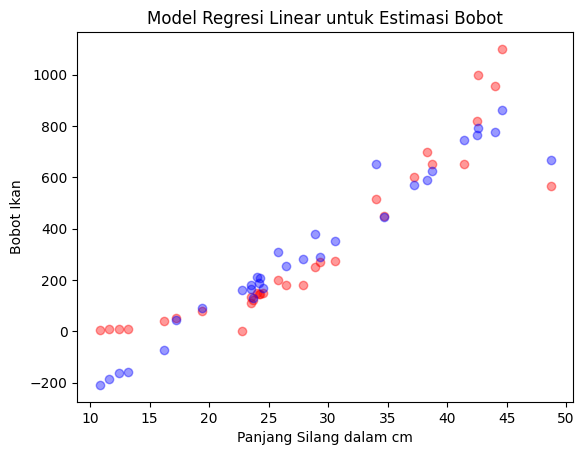

In [ ]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Panjang Silang dalam cm')
plt.ylabel('Bobot Ikan')
plt.title('Model Regresi Linear untuk Estimasi Bobot');

plt.show()


* Titik merah mewakili bobot aktual dari dataset uji (y_test) yang diberi warna merah dengan tingkat transparansi 0,4.
* Titik biru mewakili bobot yang diprediksikan oleh model (y_pred) dengan menggunakan panjang silang (LengthCro) sebagai sumbu x. yang diberi warna biru dengan tingkat transparansi 0,4.

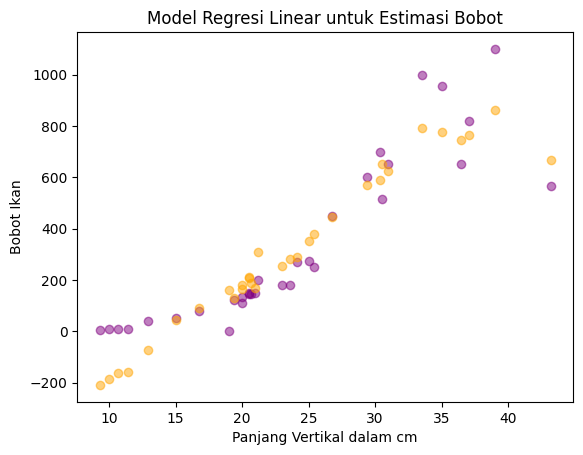

In [ ]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Panjang Vertikal dalam cm')
plt.ylabel('Bobot Ikan')
plt.title('Model Regresi Linear untuk Estimasi Bobot');

plt.show()


* Titik ungu mewakili bobot aktual dari dataset uji (y_test) yang diberi warna ungu dengan tingkat transparansi 0,5.
* Titik jingga mewakili bobot yang diestimasikan oleh model (y_pred) dengan menggunakan panjang vertikal (LengthVer) sebagai sumbu x. Titik-titik ini diberi warna jingga dengan tingkat transparansi 0,5.

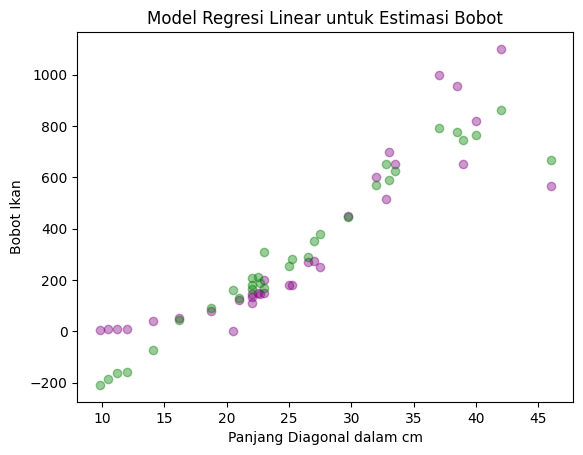

In [ ]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Panjang Diagonal dalam cm')
plt.ylabel('Bobot Ikan')
plt.title('Model Regresi Linear untuk Estimasi Bobot');

plt.show()


* Titik ungu mewakili bobot aktual dari dataset uji (y_test) yang diberi warna ungu dengan tingkat transparansi 0,4.
* Titik hijau mewakili bobot yang diestimasikan oleh model (y_pred) dengan menggunakan panjang diagonal (LengthDia) sebagai sumbu x. Titik-titik ini diberi warna hijau dengan tingkat transparansi 0,4.

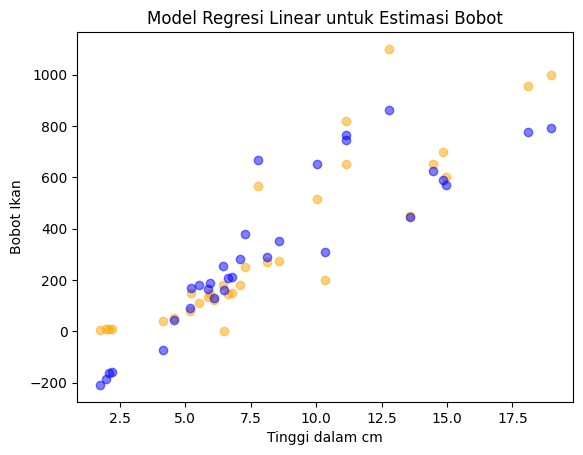

In [ ]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Tinggi dalam cm')
plt.ylabel('Bobot Ikan')
plt.title('Model Regresi Linear untuk Estimasi Bobot');

plt.show()


* Titik oranye mewakili bobot aktual dari dataset uji (y_test) yang diberi warna oranye dengan tingkat transparansi 0,5.
* Titik biru mewakili bobot yang diestimasikan oleh model (y_pred) dengan menggunakan tinggi (Height) sebagai sumbu x. Titik-titik ini diberi warna biru dengan tingkat transparansi 0,5.

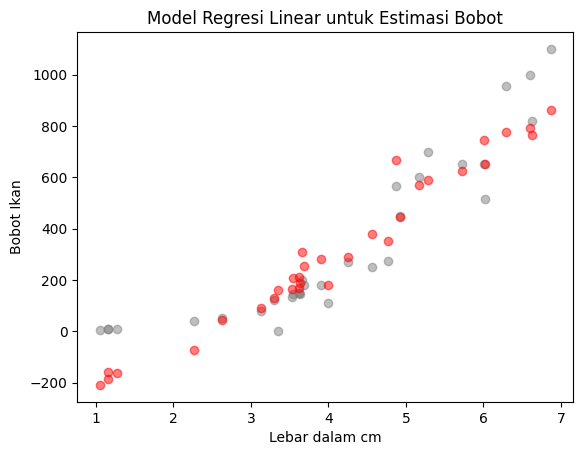

In [ ]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Lebar dalam cm')
plt.ylabel('Bobot Ikan')
plt.title('Model Regresi Linear untuk Estimasi Bobot');

plt.show()


* Titik abu-abu mewakili bobot aktual dari dataset uji (y_test) yang diberi warna abu-abu dengan tingkat transparansi 0,5.
* Titik merah mewakili bobot yang diestimasikan oleh model (y_pred) dengan menggunakan lebar (Width) sebagai sumbu x. Titik-titik ini diberi warna merah dengan tingkat transparansi 0,5.

**5. Menggambarkan Perbandingan Bobot Aktual dan Bobot yang Diprediksi**

In [ ]:
y_pred1 = pd.DataFrame(y_pred, columns=['Bobot prediksi'])
y_pred1.head()

,Bobot prediksi
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


Kode di atas digunakan untuk membuat DataFrame baru yang berisi prediksi bobot  dari model. DataFrame ini diberi nama y_pred1, dan kolomnya diberi nama 'Estimated Weight'. Dengan menggunakan DataFrame ini, kita dapat dengan mudah memeriksa dan menganalisis prediksi bobot yang dihasilkan oleh model.

In [ ]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


code diatas digunakan untuk membuat DataFrame baru yang berisi bobot asli (y_test) dari dataset uji. DataFrame ini diberi nama y_test1.

In [ ]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew
#digunakan untuk menampilkan perbandingan antara bobot asli dan bobot prediksi dari model regresi

,Weight,Bobot prediksi
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


Dari hasil di atas, dapat dilihat bahwa terdapat kecenderungan untuk estimasi yang kurang akurat terjadi ketika bobotnya ikannya kecil.

# Penghitungan Manual

In [ ]:
import numpy as np

# Data training
X = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9],
              [4, 8, 12],
              [5, 10, 15]])
Y = np.array([6, 12, 18, 24, 30])

# Menambahkan kolom dengan nilai konstan 1 untuk intercept
X = np.column_stack((np.ones(len(X)), X))

# Menghitung theta dengan menggunakan metode gradien turun (gradient descent)
learning_rate = 0.01
epochs = 1000
n = X.shape[1]
m = len(X)

theta = np.zeros(n)  # Inisialisasi theta dengan nilai awal 0

for epoch in range(epochs):
    # Menghitung prediksi
    predictions = np.dot(X, theta)

    # Menghitung error
    errors = predictions - Y

    # Menghitung gradien
    gradient = (1/m) * np.dot(X.T, errors)

    # Mengupdate theta
    theta -= learning_rate * gradient

# Menampilkan theta hasil training
print("Theta:")
for i in range(n):
    print("Theta", i, ":", theta[i])


    # Menghitung nilai R-squared (koefisien determinasi)
mean_y = np.mean(Y)
ss_total = np.sum((Y - mean_y) ** 2)
ss_residual = np.sum(errors ** 2)
r_squared = 1 - (ss_residual / ss_total)

print("Nilai R-squared (koefisien determinasi):", r_squared)

Theta:
Theta 0 : 0.019045654862631812
Theta 1 : 0.4281999730869451
Theta 2 : 0.8563999461738901
Theta 3 : 1.2845999192608368
Nilai R-squared (koefisien determinasi): 0.9999990806695293
